# Topic 8: The `Python` scientific modules - `numpy` and `scipy`

## scipy

`Scipy` is another `Python` module that offers a large number of pre-written routines for data manipulation including integration,  solving differential equations, Fourier analysis and transforms, statistics, image processing, etc.

There is a lot of information about scipy at [www.scipy.org](www.scipy.org)

In PHY235 we will limit our use of `scipy` to *differentiation*, *integration* and *Fourier Transforms*.

### Integration

General integration is done with the `quad` function, part of the `scipy.integrate` sub-package. To access this function it is necessary to use the following form of the `import` command

<pre>
from scipy.integrate import quad
</pre>

Calls to the `quad` function are of the general form

<pre>
result = quad(func, limlo, limho)
</pre>

where **func** here is the *function* to be integrated, it should be a *callable* `Python` object (i.e. a function, method or class). For the purposes of this course we will only use a *function* here. `quad` returns a tuple containing 2 values, the *first* is the value of the integration, the *second* is an upper bound on the error. Here is an example of a short script to perform the integration

$$ \large{ \large{ \int^{+\pi/2}_{-\pi/2}y(x)dx \hspace{1cm} \mathrm{where} \hspace{1cm} y(x) = x^{3}sin(2x) }}$$

In [2]:
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return(x**3*math.sin(2*x))


LimLo=-math.pi/2
LimHi=math.pi/2
intValue,intError=quad(func,LimLo,LimHi)


print('%.4f %g' % (intValue,intError))

1.5196 1.07246e-13


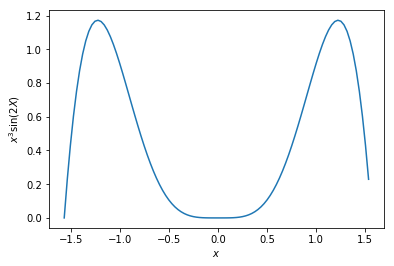

In [49]:
xAxisValues = np.arange(-np.pi/2,np.pi/2, np.pi/100) 
FuncValues = [ func(x) for x in xAxisValues ] 

plt.plot(xAxisValues, FuncValues)
plt.xlabel('$x$')
plt.ylabel('$x^3 \sin(2X)$')
plt.show()

In [3]:
?quad

Double, triple and higher level integration can be done with the `dblquad`, `tplquad` and `nqua`d fucntions from the `scipy.integrate` package.

### Fourier transforms 

`scipy` offers a way of performing Fourier transforms on data using routines from the `fftpack` package. The following example performs a fast Fourier transform (**FFT**) on the function **f** where

$$ \large{\large{f=5\cos(4x)+6\cos(3x)+\cos(2x)+3\cos(x)}}$$

this is a very similar problem to a question in the PHY250 tutorial questions on Fourier Techniques 

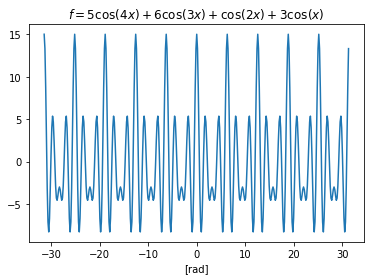

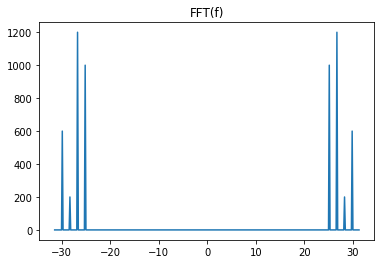

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin, cos
from scipy.fftpack import fft
#
def myfunc(x):
    return(5*cos(4*x)+6*cos(3*x)+cos(2*x)+3*cos(x))

# Create the X/Y data
xAxisValues = np.arange(-10*pi, 10*pi, pi/20) 
FuncValues = [ myfunc(x) for x in xAxisValues ]        

# Visualise the function
plt.plot(xAxisValues, FuncValues)
plt.title('$f=5\cos(4x)+6\cos(3x)+\cos(2x)+3\cos(x)$')
plt.xlabel('[rad]')
plt.show()

# Calculate the fft
FuncFFT=fft(FuncValues)
FuncFFT=np.abs(FuncFFT)
plt.title('FFT(f)')

# Visualise the fft
plt.plot(xAxisValues, FuncFFT)
plt.show()

In [2]:
?fft

** Notes **
1. in this example the `pyplot` plotting package has been used to visualise the data. The entry
<pre>
%matplotlib inline
</pre>
causes the plots to be drawn **inline** in the output cell of the Jupyter notebook. (Otherwise a separate window is created).

### Solving ordinary differential equations (OEDs)

The `scipy.integrate` package provides a function called **odeint** which can be used to solve differential equations.

**odeint** has many options. In its simplest form it can be executed via a function call such as 

<pre>
y = odeint(func, y0, t)
</pre>

where
* **y** is the output (solution) from **odeint**
* **func** is a `Python` version of the mathematical function to be solved 
* **y0** is the value of **y(0)**
* **t** is a `numpy` array of values for **t**

The following  is a simple example of solving a first order differential equation

$$ \large{\large{ \frac{dy}{dt} = -2y, \hspace{1cm} y(0)=5, \hspace{1cm} (0 \leq t \leq 4)}} $$

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
def dydt(y,t):        # see Note 1
    return (-2 * y)  
y0 = 5
tvec = np.linspace(0, 4, 41)
print(tvec)
yvec = odeint(dydt, y0, tvec)
plt.plot(tvec,yvec)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


** Notes **

1. This function **must** have 2 input variables even if the output is only dependent on one of those

### Solving second order differential equations 

It is possible to use `scipy` to solved second order *differential equations*. In this case the *first step* is **always** to *transform* any nth-order ODE into a system of n first order ODEs. In addition we also need n initial conditions, one for each variable represented in the first order ODEs. This is best illustrated with an example.

For a damped harmonic oscillator of mass m then

$$ \large{\large{ m\frac{d^{2}x}{dt^{2}} + b\frac{dx}{dt} + kx = 0 }} $$

where **b** is the damping coefficient and **k** is the spring constant

This can be rewritten as

$$ \large{\large{\frac{d^{2}x}{dt^{2}} = -\left(\frac{b}{m}\right)\frac{dx}{dt} - \left(\frac{k}{m}\right)x }} $$

To solve using **odeint** this needs to be written as two first order ODEs as follows

$$ \large{\large{\frac{dx}{dt} = v}} $$

$$ \large{\large{\frac{dv}{dt} = -\left(\frac{b}{m}\right)v -\left(\frac{k}{m}\right)x}} $$

Taking **m=l**, **k=1.2**, **b=0.3** and the initial conditions as **x=1** and **dx/dt=v=0** respectively 
it is then possible to set up a `Python` script to solve these two equations simultaneously, as follows


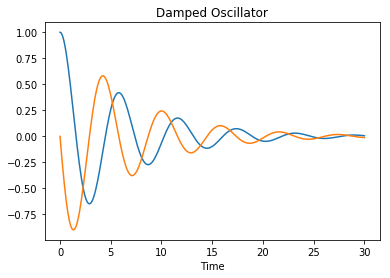

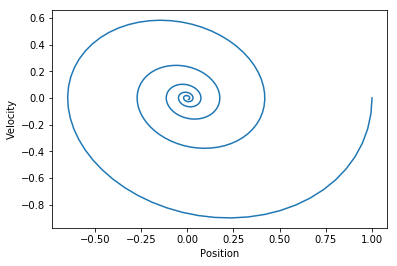

In [50]:
%matplotlib inline
from scipy.integrate import odeint
from matplotlib.pyplot import plot, xlabel, ylabel, show, title
from numpy import linspace

def DampedOsc(Z,t,b,k,m):
    x=Z[0]; v=Z[1]
    return(v,-(k*x/m)-(b*v/m))

t = linspace(0,30,300)
U0 = [1,0] # Initial values
b = 0.3    # b is the damping coefficient
k = 1.2    # k is the spring constant
m = 1      # m is the mass

U=odeint(DampedOsc,U0,t,args=(b,k,m)) #constants needed in function can be passed as arguments

plot(t,U) # Note - this plots both columns of the vector U
xlabel('Time'); title('Damped Oscillator')
show()
plot(U[:,0],U[:,1])
xlabel('Position'); ylabel('Velocity')
show()

The same technique can be used to solve 2 simultaneous first order ODEs.

** Note ** by definition the first argument to this function called by `odeint` (argument **Z** in the function *DampedOsc* in the example above) is a vector which contains values of the 2 variables which `odeint` are being solved for. So, in the example above **Z=[x,v]**. You do not have to provide values for **Z**, `odeint` will do this automatically. The function must however return the derivatives of the variables, in this case **[x',v']**.

### Interpolation 

The following example illustrates the `interp1d` function (**note** that this is **interp-1-d** not **interp-l-d**). 

A *sparsely sampled* series of data points (just **13** points over the range -2.5$\pi$ to +2.5$\pi$) of the *cosine* function is *interpolated* using the `interp1d` function using both Linear and Cubic interpolation. The resulting functions, **InterpLin** and **InterpCub** can be used to predict a value of the function for any value of **x**. For the cubic interpolation the agreement between the function and the actual *cosine* function is excellent.

It is of interest to re-run the `Python` script with varying values of the number of samples (13 in this example) to observe how the accuracy of the interpolation varies. This example also illustrates use of the `subplot` command.

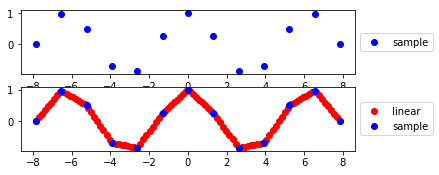

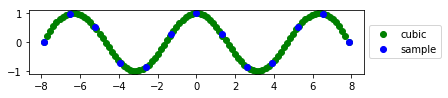

In [4]:
%matplotlib inline
from scipy.interpolate import interp1d
import numpy as np
from math import cos,pi
import matplotlib.pyplot as plt

# The following plots cos(x) between -2.5pi and +2.5pi with 100 sample points
xAxisHi = np.linspace(-2.5*pi, 2.5*pi, 100)
yCosHi = np.cos(xAxisHi)

# 13 samples of cos(x) in the same interval range
xAxisLo = np.linspace(-2.5*pi, 2.5*pi, 13)
yCosLo = np.cos(xAxisLo)

# interpolation (linear and cubic)
InterpLin = interp1d(xAxisLo, yCosLo, kind='linear')
InterpCub = interp1d(xAxisLo, yCosLo, kind='cubic')

# plot cosine function from -2.5pi to +2.5pi
plt.subplot(311)
plt.plot(xAxisLo, yCosLo, 'bo')
plt.legend(['sample'],loc='center left', bbox_to_anchor=(1, 0.5))
#... and add the interpolation
plt.subplot(312)
plt.plot(xAxisHi, InterpLin(xAxisHi),'ro',xAxisLo, yCosLo, 'bo')
plt.legend(['linear','sample'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.subplot(312)
plt.plot(xAxisHi, InterpCub(xAxisHi),'go',xAxisLo, yCosLo, 'bo')
plt.legend(['cubic','sample'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Numerical integration

In the case where we have an array of y values without knowing the explicit functional dependence of y and x, it is still possible to perform a *numerical integration* using `scipy's` **simps** function (within the `integrate` package). `scipy.integrate.simps` uses *Simpson's rule* to perform the numerical integration. In the following the data from the **Interpolation** example are compared in 3 ways: 
1. Integrate the cosine function 
2. Integrate the function from the cubic interpolation
3. Numerically integrate the array of points

A high level of agreement between the three methods is observed.

Integrating cosine function: value=2.0000 error=1.11662e-13
Integrating cubic interpolation: value=2.0962 error=2.32535e-08
Integrating 13 sample points: value=2.0407


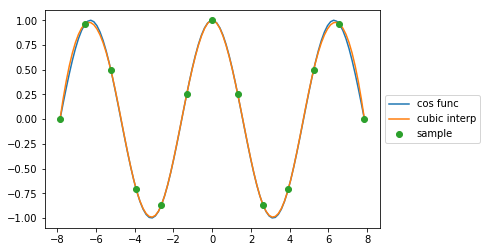

In [3]:
from scipy.interpolate import interp1d
from scipy.integrate import quad,simps
import numpy as np
from math import cos,pi,sin
import matplotlib.pyplot as plt

# The following plots cos(x) between -2.5pi and +2.5pi with 100 sample points
xAxisHi = np.linspace(-2.5*pi, 2.5*pi, 100)
yCosHi = np.cos(xAxisHi)
plt.plot(xAxisHi,yCosHi,label='cos func')
# 13 samples of cos(x) in the same interval range
xAxisLo = np.linspace(-2.5*pi, 2.5*pi, 13)
yCosLo = np.cos(xAxisLo)

# interpolation (linear and cubic)
InterpLin = interp1d(xAxisLo, yCosLo, kind='linear')
InterpCub = interp1d(xAxisLo, yCosLo, kind='cubic')

# First integrate cos(theta) from -2.5*pi to +2.5*pi
LimLo=-2.5*pi
LimHi=2.5*pi
intFunc,intFuncError=quad(cos,LimLo,LimHi)
print('Integrating cosine function: value=%.4f error=%g' % (intFunc,intFuncError))
intCubic,intCubicError=quad(InterpCub,LimLo,LimHi)
print('Integrating cubic interpolation: value=%.4f error=%g' % (intCubic,intCubicError))
intSimpson=simps(yCosLo,xAxisLo)
print('Integrating 13 sample points: value=%.4f' % (intSimpson))

# Plot Data
plt.plot(xAxisHi,InterpCub(xAxisHi),label='cubic interp')
plt.plot(xAxisLo,yCosLo,'o',label='sample')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()